#### Download Humans or Horses Dataset Part 1 

---------------

In [1]:
# pip install tensorflow_datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

In [3]:
dataset, info = tfds.load('horses_or_humans', with_info=True, as_supervised=True)

In [4]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_dir='C:\\Users\\USER\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",


In [5]:
class_names = info.features['label'].names
class_names

['horses', 'humans']

#### Download Humans or Horses Dataset Part 2

------------------

In [6]:
info.supervised_keys, info.splits

(('image', 'label'),
 {'train': <SplitInfo num_examples=1027, num_shards=2>,
  'test': <SplitInfo num_examples=256, num_shards=1>})

In [7]:
dataset

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [8]:
dataset['train']

<_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [9]:
for i, example in enumerate(dataset['train']):
    image, label = example
    save_dir = 'horse-or-human/train/{}'.format(class_names[label])
    os.makedirs(save_dir, exist_ok=True)
    filepath = save_dir + "/" + class_names[label] + "_" + str(i) + '.jpg'
    # print(i, label, save_dir)
    # print(filepath)

    # if i>5:
    #     break

    tf.keras.preprocessing.image.save_img(filepath, image.numpy())

In [10]:
image

<tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[192, 215, 233],
        [193, 215, 233],
        [193, 215, 234],
        ...,
        [244, 255, 255],
        [245, 255, 255],
        [245, 255, 255]],

       [[193, 215, 234],
        [193, 215, 234],
        [193, 215, 234],
        ...,
        [244, 255, 255],
        [245, 255, 255],
        [245, 255, 255]],

       [[193, 216, 234],
        [193, 216, 234],
        [193, 216, 234],
        ...,
        [244, 255, 255],
        [245, 255, 255],
        [244, 255, 255]],

       ...,

       [[ 64,  55,  51],
        [ 62,  53,  50],
        [ 54,  47,  44],
        ...,
        [ 36,  31,  30],
        [ 30,  26,  25],
        [ 30,  26,  24]],

       [[ 59,  50,  46],
        [ 58,  50,  46],
        [ 55,  49,  46],
        ...,
        [ 37,  33,  32],
        [ 29,  25,  24],
        [ 27,  23,  21]],

       [[ 56,  47,  43],
        [ 55,  47,  43],
        [ 52,  46,  43],
        ...,
        [ 48,  43,  4

In [11]:
for i, example in enumerate(dataset['test']):
    image, label = example
    save_dir = 'horse-or-human/test/{}'.format(class_names[label])
    os.makedirs(save_dir, exist_ok=True)
    filepath = save_dir + "/" + class_names[label] + "_" + str(i) + '.jpg'
    # print(i, label, save_dir)
    # print(filepath)

    # if i>5:
    #     break

    tf.keras.preprocessing.image.save_img(filepath, image.numpy())

#### Use of Image Data Generator

---------------------------------

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size=(300,300)
batch_size = 32

train_dir = "horse-or-human/train"
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = image_size, batch_size = batch_size, class_mode = "binary")

test_dir = "horse-or-human/test"
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size= image_size, batch_size= batch_size, class_mode="binary")


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


#### Data Display in Subplots Matrix

------------------------

In [13]:
train_generator.class_indices, train_generator.class_mode, train_generator.classes

({'horses': 0, 'humans': 1}, 'binary', array([0, 0, 0, ..., 1, 1, 1]))

In [14]:
train_generator.filenames[:5], train_generator.samples

(['horses\\horses_0.jpg',
  'horses\\horses_1.jpg',
  'horses\\horses_1000.jpg',
  'horses\\horses_1004.jpg',
  'horses\\horses_1005.jpg'],
 1027)

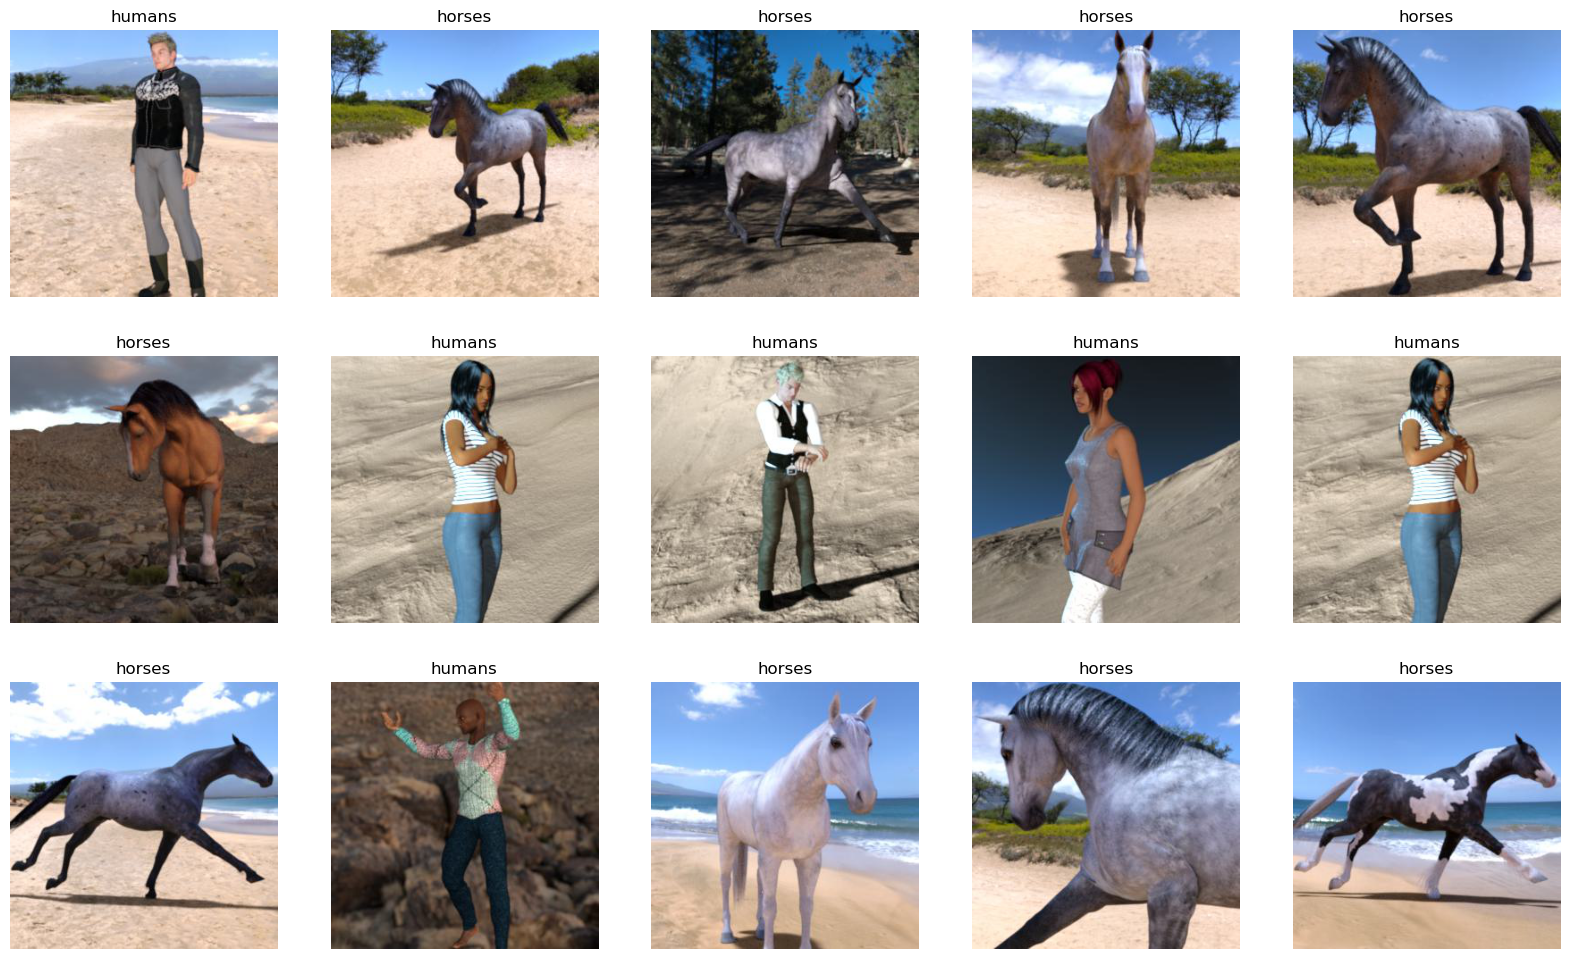

In [15]:
import matplotlib.pyplot as plt

nrows = 3
ncols = 5

train_path = 'horse-or-human/train'
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_batch = train_generator.next()
for i in range(0, nrows*ncols):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.axis('Off')
    plt.imshow(next_batch[0][i])
    class_idx = next_batch[1][i]
    plt.title(class_names[int(class_idx)])

plt.show()

#### Building CNN Model

---------------------

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import tensorflow as tf

In [17]:
def get_model():
    model = Sequential()

    # 1st Layer CNN
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(300,300,3)))
    model.add(MaxPooling2D(pool_size=(5,5)))

    # 2nd layer CNN
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5,5)))

    # 3rd layer CNN
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    # 4th layer CNN
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))

    # add flatten layer
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    return model

In [18]:
model = get_model()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 512)         1180160   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 512)         0

In [20]:
# size of output layer for conv layer
# total param for conv layer
# output size after maxpool layer
# total param for dense layer

In [21]:
# size of output layer for conv layer (300,300,3) -> (None, 298,298, 128)
# input_size-(filter_size-1)
300 - (3-1), 300-(3-1),128 # no. of kernels/filters 

(298, 298, 128)

In [22]:
# total param for conv layer
# (n*k*K+1)*f -> (# channel in prev layer * filt_size*filt_size + 1 (bias term) *# filter in current layer)
(3*3*3+1)*128

3584

In [23]:
#  (None, 57, 57, 256) -2nd layer of CNN
(128*3*3+1)*256 , (256*3*3+1)*512, (512*3*3+1)*512


(295168, 1180160, 2359808)

#### CNN Parameter Calculation Part 3

---------------------------------

In [24]:
# total param for dense layer (n+1)*m n=number of inputs, m=number of cells
(2048+1)*512, (512+1)*1

(1049088, 513)

In [25]:
# output size after maxpool layer | floor((w-f)/s+1), floor -> 19.9 => 10, 10.1 => 10
# 298, 298 -> 59, 59
np.floor((298-5)/5+1)

59.0

##### Model Training

-------------------------------------

In [26]:
model.layers

In [27]:
model.layers[0].get_weights()

[array([[[[-0.04024033,  0.02674311, -0.03753552, ...,  0.0220598 ,
            0.02230514,  0.06369282],
          [-0.03233414,  0.03485721,  0.0197554 , ..., -0.06176955,
           -0.06522475,  0.02553304],
          [ 0.00436336, -0.05325397,  0.04078682, ..., -0.06545491,
           -0.00070065,  0.03544271]],
 
         [[ 0.04791258,  0.04555763,  0.04917525, ...,  0.03004315,
            0.01292741,  0.00142738],
          [ 0.02495959, -0.04204557, -0.01555082, ..., -0.05367636,
           -0.06927975, -0.07038967],
          [ 0.02502249,  0.02592881, -0.0533549 , ...,  0.0138999 ,
           -0.06019654, -0.02094574]],
 
         [[-0.06939943,  0.0565778 , -0.01862244, ..., -0.02473638,
            0.04764662, -0.03636053],
          [ 0.0668752 , -0.05310417,  0.00868116, ...,  0.03461737,
            0.06338669, -0.05449763],
          [ 0.0381354 , -0.05674775, -0.00393737, ...,  0.00721142,
           -0.06398264, -0.03234885]]],
 
 
        [[[-0.04914561,  0.0691228

In [28]:
weights, biases = model.layers[0].get_weights()

In [29]:
len(biases), len(weights[0][0])

(128, 3)

In [30]:
len(biases), len(weights[0][0][0])

(128, 128)

In [31]:
# 2nd layer -- pooling layer
model.layers[1].get_weights()

[]

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=4, validation_data= test_generator)

Epoch 1/4



33/33 [==============================] - 204s 6s/step - loss: 0.4882 - accuracy: 0.7400 - val_loss: 1.2380 - val_accuracy: 0.8477
Epoch 2/4
33/33 [==============================] - 154s 5s/step - loss: 0.1467 - accuracy: 0.9426 - val_loss: 1.1990 - val_accuracy: 0.8203
Epoch 3/4
33/33 [==============================] - 155s 5s/step - loss: 0.0390 - accuracy: 0.9873 - val_loss: 2.2075 - val_accuracy: 0.8320
Epoch 4/4
33/33 [==============================] - 157s 5s/step - loss: 0.0955 - accuracy: 0.9688 - val_loss: 1.5940 - val_accuracy: 0.8398


In [33]:
history.history

{'loss': [0.48815909028053284,
  0.14672471582889557,
  0.038977112621068954,
  0.09546632319688797],
 'accuracy': [0.7400195002555847,
  0.9425511360168457,
  0.9873417615890503,
  0.9688413143157959],
 'val_loss': [1.2379921674728394,
  1.1990293264389038,
  2.207507610321045,
  1.593983769416809],
 'val_accuracy': [0.84765625, 0.8203125, 0.83203125, 0.83984375]}